## Import Libraries

In [2]:
import pandas
import numpy
import matplotlib.pyplot as plt

import sklearn.ensemble as ek
from sklearn.feature_selection import SelectFromModel

from sklearn.model_selection import train_test_split
from sklearn.tree import plot_tree
from sklearn.metrics import confusion_matrix, plot_confusion_matrix
import warnings
warnings.filterwarnings("ignore")

In [3]:
dataset = pandas.read_csv('data.csv',sep='|', low_memory=False)

### Exploring the Dataset

In [25]:
dataset.head()

,Name,md5,Machine,SizeOfOptionalHeader,Characteristics,MajorLinkerVersion,MinorLinkerVersion,SizeOfCode,SizeOfInitializedData,SizeOfUninitializedData,...,ResourcesNb,ResourcesMeanEntropy,ResourcesMinEntropy,ResourcesMaxEntropy,ResourcesMeanSize,ResourcesMinSize,ResourcesMaxSize,LoadConfigurationSize,VersionInformationSize,legitimate
0,memtest.exe,631ea355665f28d4707448e442fbf5b8,332,224,258,9,0,361984,115712,0,...,4,3.262823,2.568844,3.537939,8797.000000,216,18032,0,16,1
1,ose.exe,9d10f99a6712e28f8acd5641e3a7ea6b,332,224,3330,9,0,130560,19968,0,...,2,4.250461,3.420744,5.080177,837.000000,518,1156,72,18,1
2,setup.exe,4d92f518527353c0db88a70fddcfd390,332,224,3330,9,0,517120,621568,0,...,11,4.426324,2.846449,5.271813,31102.272727,104,270376,72,18,1
3,DW20.EXE,a41e524f8d45f0074fd07805ff0c9b12,332,224,258,9,0,585728,369152,0,...,10,4.364291,2.669314,6.400720,1457.000000,90,4264,72,18,1
4,dwtrig20.exe,c87e561258f2f8650cef999bf643a731,332,224,258,9,0,294912,247296,0,...,2,4.306100,3.421598,5.190603,1074.500000,849,1300,72,18,1


In [26]:
dataset.describe()

,Machine,SizeOfOptionalHeader,Characteristics,MajorLinkerVersion,MinorLinkerVersion,SizeOfCode,SizeOfInitializedData,SizeOfUninitializedData,AddressOfEntryPoint,BaseOfCode,...,ResourcesNb,ResourcesMeanEntropy,ResourcesMinEntropy,ResourcesMaxEntropy,ResourcesMeanSize,ResourcesMinSize,ResourcesMaxSize,LoadConfigurationSize,VersionInformationSize,legitimate
count,138047.000000,138047.000000,138047.000000,138047.000000,138047.000000,1.380470e+05,1.380470e+05,1.380470e+05,1.380470e+05,1.380470e+05,...,138047.000000,138047.000000,138047.000000,138047.000000,1.380470e+05,1.380470e+05,1.380470e+05,1.380470e+05,138047.000000,138047.000000
mean,4259.069274,225.845632,4444.145994,8.619774,3.819286,2.425956e+05,4.504867e+05,1.009525e+05,1.719561e+05,5.779845e+04,...,22.050700,4.000127,2.434541,5.521610,5.545093e+04,1.818082e+04,2.465903e+05,4.656750e+05,12.363115,0.299340
std,10880.347245,5.121399,8186.782524,4.088757,11.862675,5.754485e+06,2.101599e+07,1.635288e+07,3.430553e+06,5.527658e+06,...,136.494244,1.112981,0.815577,1.597403,7.799163e+06,6.502369e+06,2.124860e+07,2.608987e+07,6.798878,0.457971
min,332.000000,224.000000,2.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000
25%,332.000000,224.000000,258.000000,8.000000,0.000000,3.020800e+04,2.457600e+04,0.000000e+00,1.272100e+04,4.096000e+03,...,5.000000,3.458505,2.178748,4.828706,9.560000e+02,4.800000e+01,2.216000e+03,0.000000e+00,13.000000,0.000000
50%,332.000000,224.000000,258.000000,9.000000,0.000000,1.136640e+05,2.631680e+05,0.000000e+00,5.288300e+04,4.096000e+03,...,6.000000,3.729824,2.458492,5.317552,2.708154e+03,4.800000e+01,9.640000e+03,7.200000e+01,15.000000,0.000000
75%,332.000000,224.000000,8226.000000,10.000000,0.000000,1.203200e+05,3.850240e+05,0.000000e+00,6.157800e+04,4.096000e+03,...,13.000000,4.233051,2.696833,6.502239,6.558429e+03,1.320000e+02,2.378000e+04,7.200000e+01,16.000000,1.000000
max,34404.000000,352.000000,49551.000000,255.000000,255.000000,1.818587e+09,4.294966e+09,4.294941e+09,1.074484e+09,2.028711e+09,...,7694.000000,7.999723,7.999723,8.000000,2.415919e+09,2.415919e+09,4.294903e+09,4.294967e+09,26.000000,1.000000


In [27]:
dataset.groupby(dataset['legitimate']).size()
X = dataset.drop(['Name','md5','legitimate'],axis=1).values
y = dataset['legitimate'].values

Declaring the input variables x and output labels y

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X, y ,test_size=0.2, shuffle=True)

In [29]:
print("Number of samples in Training Set =", X_train.shape[0])
print("Number of samples in Test Set =", X_test.shape[0])

Number of samples in Training Set = 110437
Number of samples in Test Set = 27610


In [30]:
forest = ek.RandomForestClassifier(n_estimators=100, oob_score=True,)
forest.fit(X_train,y_train)

RandomForestClassifier(oob_score=True)

In [31]:
score = forest.score(X_test,y_test)
print("Random Forest Accuracy:", score)

Random Forest Accuracy: 0.9944947482796088


In [32]:
predicted = forest.predict(X)
matrix = confusion_matrix(y, predicted)
false_positive = (matrix[0][1] / float(sum(matrix[0])))*100
false_negative = (matrix[1][0] / float(sum(matrix[1])))*100
print("False positive rate: " + str(false_positive) + "%")
print("False negative rate: " + str(false_negative) + "%")

False positive rate: 0.09201439146437286%
False negative rate: 0.15729738886334485%


### Plot the Confusion Matrix

Model Accuracy: 0.994495


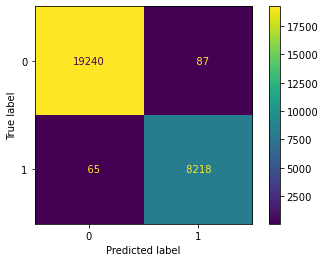

In [33]:
confusionmatrix = plot_confusion_matrix(forest, X_test, y_test, values_format='5d')
print("Model Accuracy: %f" % forest.score(X_test, y_test))  
plt.show()

##Visualizing the first tree in the random forest

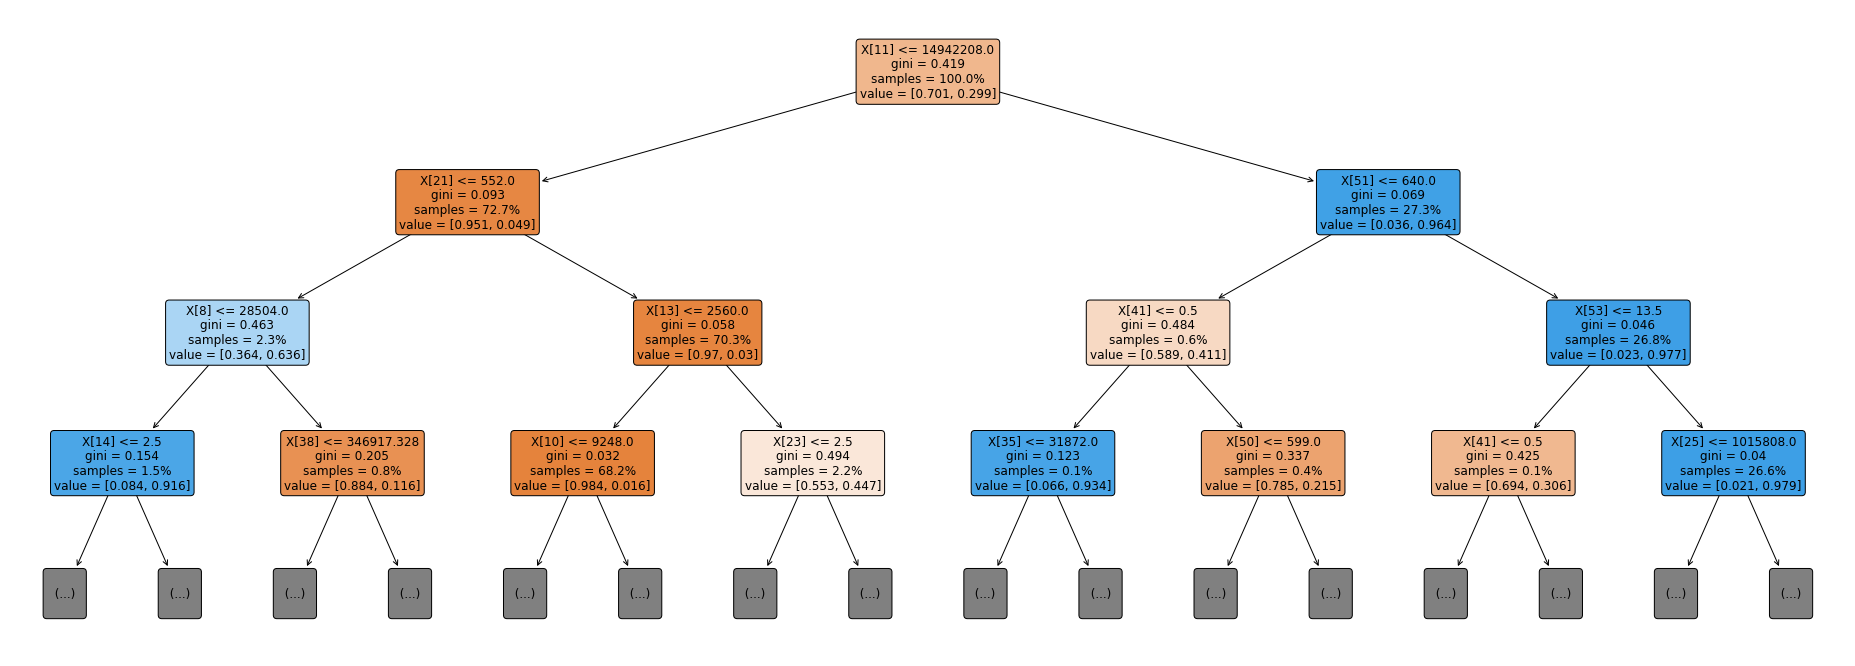

In [34]:
plt.figure(figsize=(33,12))

plot_tree(forest.estimators_[0], max_depth=3, filled=True, proportion=True, rounded=True, fontsize=12)
plt.show()

## Save the model

In [35]:
import pickle

pickle.dump(forest, open('model.pkl', 'wb'))

## Load the model

In [36]:
forest = pickle.load(open('model.pkl', 'rb'))

In [37]:
print(forest)

RandomForestClassifier(oob_score=True)


In [38]:
print(forest.score(X_test, y_test))

0.9944947482796088
